<a href="https://colab.research.google.com/github/bahu1610/ML-in-Python/blob/main/Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Probability & Kernel Distribution Analysis**

In [1]:
# Loading 2017 Happiness Index Report Data
import pandas as pd
data = pd.read_csv("/content/2017.csv", on_bad_lines= 'skip')
data.head(n=1).T

,0
Country,Norway
Happiness.Rank,1
Happiness.Score,7.537
Whisker.high,7.594445
Whisker.low,7.479556
Economy..GDP.per.Capita.,1.616463
Family,1.533524
Health..Life.Expectancy.,0.796667
Freedom,0.635423
Generosity,0.362012


In [2]:
# Getting datatypes for the different classes of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [3]:
# Getting statistical information like mean, median etc of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness.Rank,155.0,78.000000,44.888751,1.000000,39.500000,78.000000,116.500000,155.000000
Happiness.Score,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
Whisker.high,155.0,5.452326,1.118542,2.864884,4.608172,5.370032,6.194600,7.622030
Whisker.low,155.0,5.255713,1.145030,2.521116,4.374955,5.193152,6.006527,7.479556
Economy..GDP.per.Capita.,155.0,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
Family,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
Health..Life.Expectancy.,155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
Generosity,155.0,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
Trust..Government.Corruption.,155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308


<Axes: xlabel='Dystopia.Residual'>

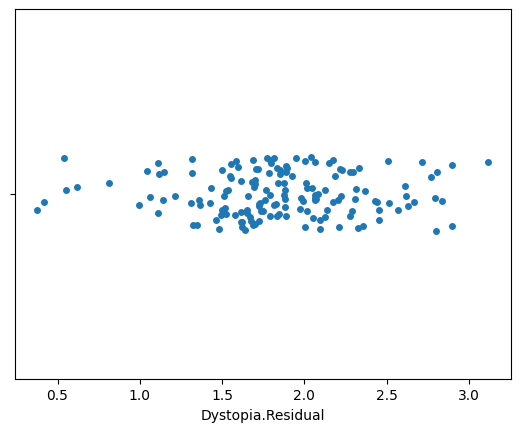

In [4]:
# Let us plot the least happy people: Dystopia Residual
# Dystopia residual are the LEAST HAPPY PEOPLE (non-negative) and used as benchmark
# to other countries

import seaborn as sns
sns.stripplot(data,  x=data['Dystopia.Residual'])

<Axes: xlabel='Dystopia.Residual', ylabel='Count'>

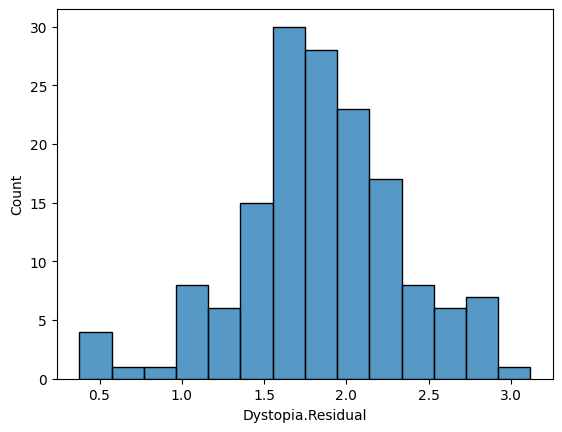

In [5]:
# We see below that histogram of Dystopia Residual shows maximum frequency around 1.7-2.3
sns.histplot(data, x=data["Dystopia.Residual"])

<ipython-input-6-3e6c287d9f69>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, x=data["Dystopia.Residual"], kde = True)


<Axes: ylabel='Density'>

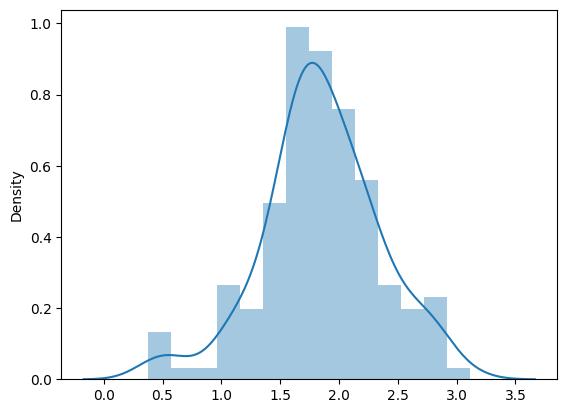

In [6]:
# Plotting the Kernel Distribution Estimator (KDE): creates a smooth curve given a dataset
# using the density function
sns.distplot(data, x=data["Dystopia.Residual"], kde = True)

<Axes: xlabel='Dystopia.Residual'>

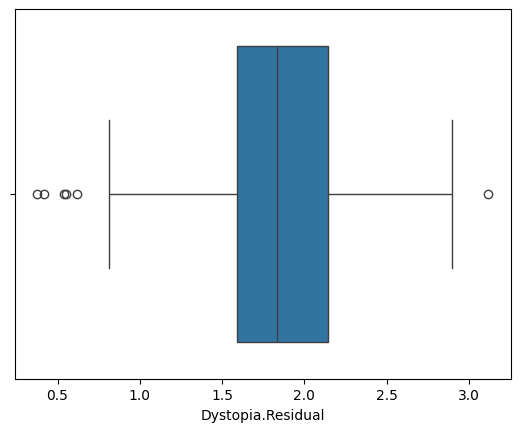

In [7]:
sns.boxplot(data, x=data["Dystopia.Residual"])

In [8]:
# Describing a function to calculate the values of the outliers
import numpy as np
def box_plot_calculator(data):
  q1 = np.percentile(data,25)
  q3 = np.percentile(data,75)
  print(f'First Quartile: {q1}, Third Quartile: {q3}')
  IQR = q3 - q1
  print(f'IQR: {IQR}')

  Cutoff = IQR * 1.5
  Max = q3 + Cutoff
  Min = q1 - Cutoff
  print(f'Cutoff: {Cutoff}')
  print(f'Maximum cutoff: {Max}, Minimum cutoff: {Min}')

  outliers = [x for x in data if x > Max or x < Min]
  outliers.sort()
  print(f'Number of outliers {len(outliers)}')
  print(f'Outliers: {outliers}')


In [9]:
# Finding the required data

box_plot_calculator(data['Dystopia.Residual'])

First Quartile: 1.5912914276123051, Third Quartile: 2.1446537971496547
IQR: 0.5533623695373495
Cutoff: 0.8300435543060243
Maximum cutoff: 2.9746973514556787, Minimum cutoff: 0.7612478733062809
Number of outliers 6
Outliers: [0.3779137134552, 0.419389247894287, 0.540061235427856, 0.554633140563965, 0.621130466461182, 3.11748456954956]


In [10]:
# 5 outliers from the left hand side and 1 outlier in the right side
# so check the skew everywhere

data1 = data.drop(columns=['Country'])
data1.skew()

,0
Happiness.Rank,0.000000
Happiness.Score,0.009554
Whisker.high,0.008410
Whisker.low,0.009116
Economy..GDP.per.Capita.,-0.390693
Family,-1.181100
Health..Life.Expectancy.,-0.577966
Freedom,-0.615766
Generosity,0.898715
Trust..Government.Corruption.,1.476362


<Axes: xlabel='Family'>

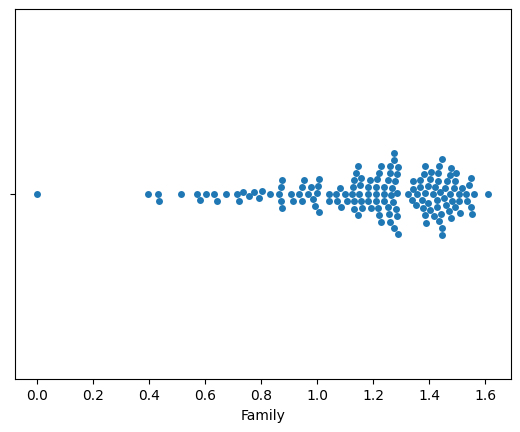

In [11]:
# Swarm Plot: Just like strip plot but does not have overlap
# so compatible when there is a lot of data

sns.swarmplot(data, x=data["Family"])

<Axes: xlabel='Family', ylabel='Count'>

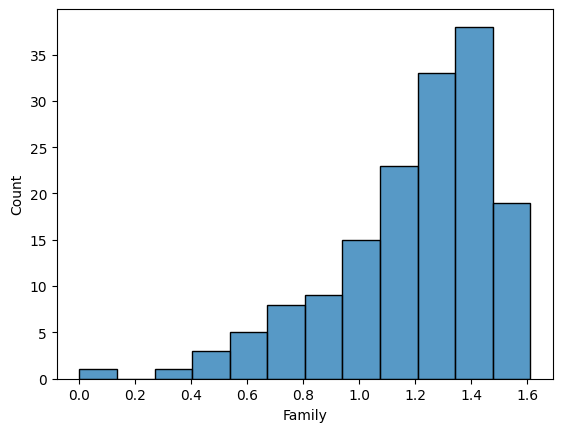

In [12]:
# Continuous Variables: Develop a histogram always to do these

sns.histplot((data['Family']))

<ipython-input-15-363954917b6e>:1: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Family"], kernel = "gau")


<Axes: xlabel='Family', ylabel='Density'>

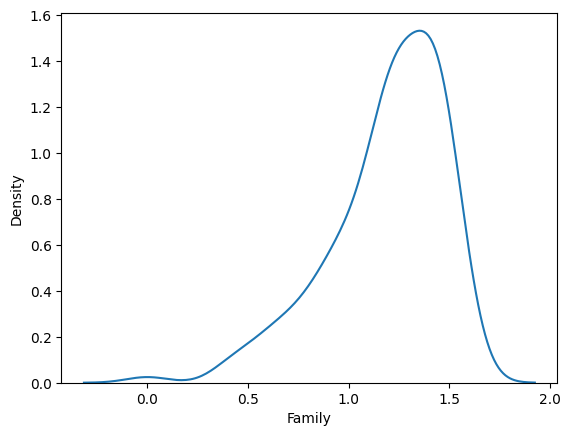

In [15]:
# Seeing data through various kernels
sns.kdeplot(data["Family"], kernel = "gau")

<ipython-input-17-9721f85e33b6>:1: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Family"], kernel = "cos")


<Axes: xlabel='Family', ylabel='Density'>

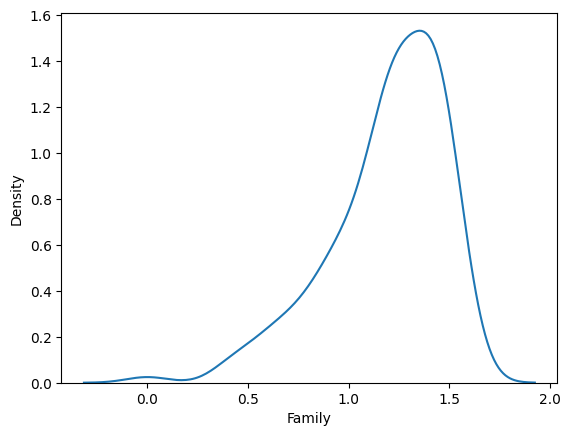

In [17]:
# Cosine kernels are rougher and reveal more intricate details about the dataset
sns.kdeplot(data["Family"], kernel = "cos")

<Axes: xlabel='Family'>

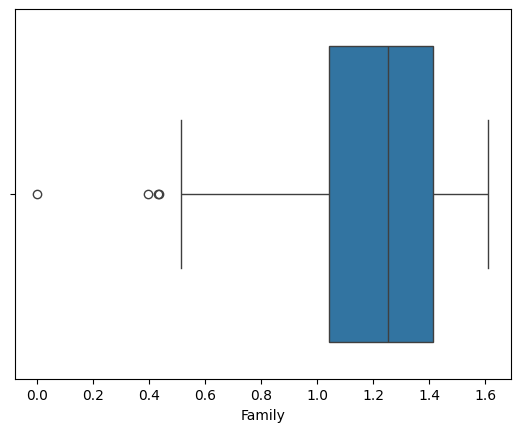

In [18]:
sns.boxplot(data, x=data["Family"])

In [19]:
# Checking exact data points of box plot

box_plot_calculator(data['Family'])

First Quartile: 1.042634904384615, Third Quartile: 1.41431576013565
IQR: 0.37168085575103493
Cutoff: 0.5575212836265524
Maximum cutoff: 1.9718370437622024, Minimum cutoff: 0.48511362075806264
Number of outliers 4
Outliers: [0.0, 0.396102607250214, 0.431882530450821, 0.435299843549728]


<ipython-input-21-0fe278f385c6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Trust..Government.Corruption."], kde = False)


<Axes: xlabel='Trust..Government.Corruption.'>

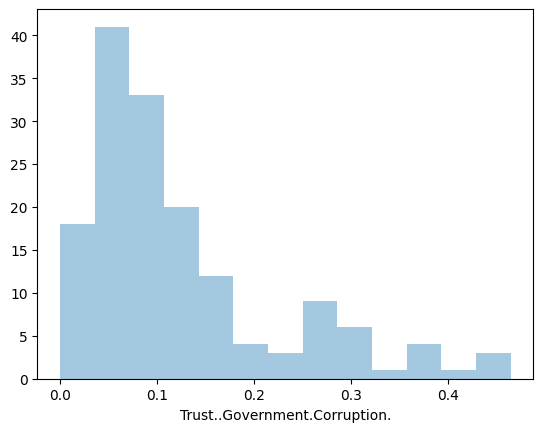

In [21]:
# Checking Positive skewness (Right skewed)

sns.distplot(data["Trust..Government.Corruption."], kde = False)

<ipython-input-23-471a30964662>:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=scott`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data["Trust..Government.Corruption."], kernel = "gau", bw = "scott")
<ipython-input-23-471a30964662>:1: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Trust..Government.Corruption."], kernel = "gau", bw = "scott")


<Axes: xlabel='Trust..Government.Corruption.', ylabel='Density'>

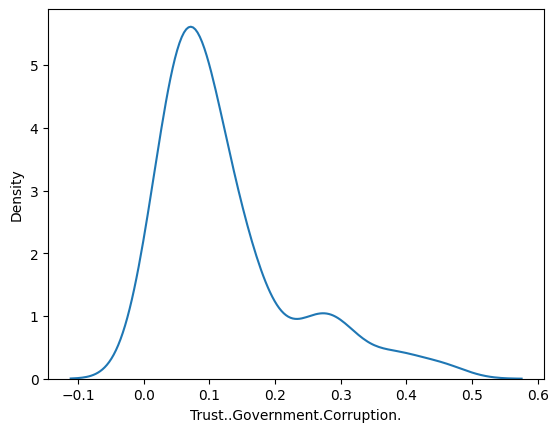

In [23]:
# Scott and Silverman are two ways to estimate bandwidth
# Low bandwidth generates higher number of bins which makes a more accurate curve

# Both scott and silverman calculate the optimal value of the bandwidth
sns.kdeplot(data["Trust..Government.Corruption."], kernel = "gau", bw = "scott")

<ipython-input-24-e94891511019>:5: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data["Trust..Government.Corruption."], kernel = "gau", bw = 1)
<ipython-input-24-e94891511019>:5: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Trust..Government.Corruption."], kernel = "gau", bw = 1)


<Axes: xlabel='Trust..Government.Corruption.', ylabel='Density'>

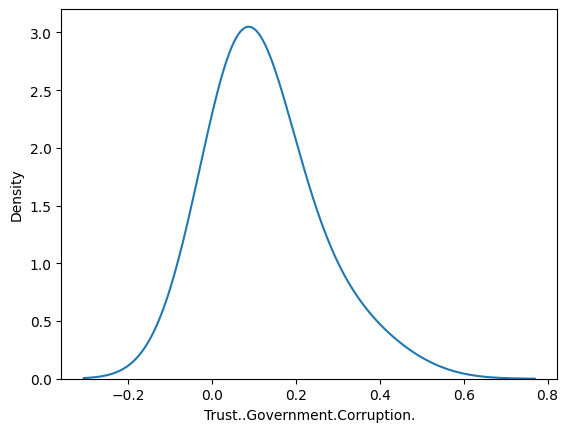

In [24]:
# Using scalars in bandwidth to check

# Scalars over smooths the curve and cannot get relevant data information from that

sns.kdeplot(data["Trust..Government.Corruption."], kernel = "gau", bw = 1)

<ipython-input-25-42d0bd7aa948>:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.001`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(data["Trust..Government.Corruption."], kernel = "gau", bw = 0.001)
<ipython-input-25-42d0bd7aa948>:3: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Trust..Government.Corruption."], kernel = "gau", bw = 0.001)


<Axes: xlabel='Trust..Government.Corruption.', ylabel='Density'>

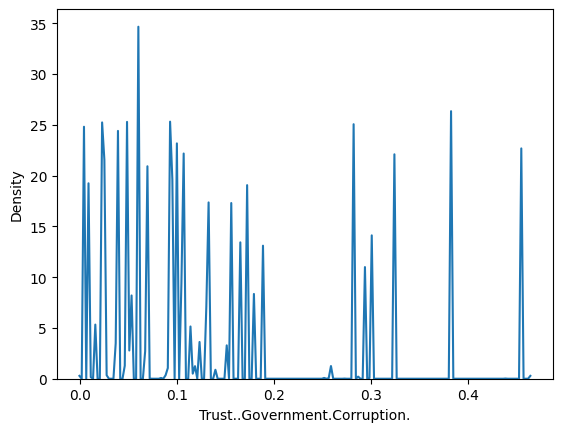

In [25]:
# If scalar is too small it will undersmooth the curve

# If number of bins is too high, then it shows all ups and downs hence we need
# optimal band width

sns.kdeplot(data["Trust..Government.Corruption."], kernel = "gau", bw = 0.001)


In [26]:
# Optimal way to select the bandwidth parameter is using the
# Silverman's rule of thumb which also calculates the Mean Integrated
# Squared Error (MISE) similar to MSE with integrals

# For Gaussian distribution, optimal choice for bandwidth (h) has separate
# formula

box_plot_calculator(data["Trust..Government.Corruption."])

First Quartile: 0.057270668447017656, Third Quartile: 0.15329631417989747
IQR: 0.09602564573287982
Cutoff: 0.14403846859931974
Maximum cutoff: 0.2973347827792172, Minimum cutoff: -0.08676780015230208
Number of outliers 13
Outliers: [0.29838815331459, 0.301183730363846, 0.315963834524155, 0.31883442401886, 0.324489563703537, 0.367007285356522, 0.38261154294014, 0.382816702127457, 0.384398728609085, 0.40077006816864, 0.439299255609512, 0.455220013856888, 0.46430778503418]


<Axes: xlabel='Trust..Government.Corruption.'>

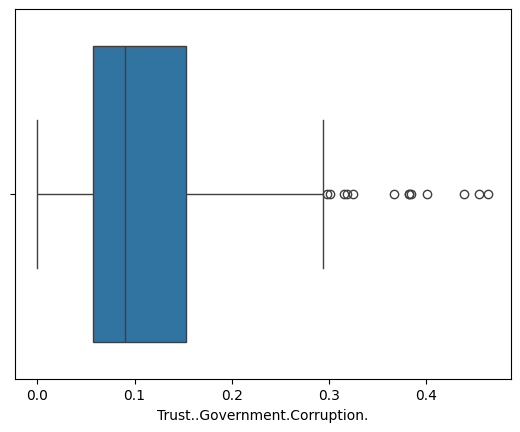

In [28]:
# Finding the boxplot:

sns.boxplot(x=data["Trust..Government.Corruption."])